In [1]:
import torch
import drlqap.nn
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
n = 8
w = 8

tensor(0.5122)


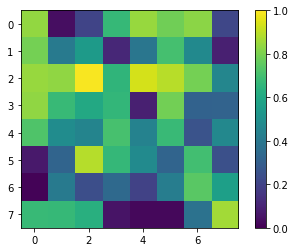

In [4]:
input_matrix = torch.rand((n, n))
print(input_matrix.mean())
plt.imshow(input_matrix, vmin=0, vmax=1)
plt.colorbar()

tensor(0.4994)


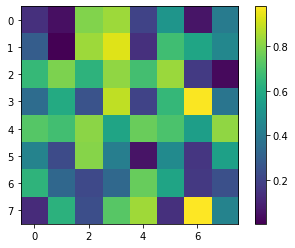

In [5]:
output_matrix = torch.rand((n, w))
print(output_matrix.mean())
plt.imshow(output_matrix)
plt.colorbar()

In [6]:
layers = {
    "LN": drlqap.nn.ConvLayer(
        edge_encoder = drlqap.nn.FullyConnected(1, w, w, 3, activation=torch.nn.Sigmoid, layer_norm=True),
        transformation = torch.nn.LayerNorm(w),
    ),
    "half LN": drlqap.nn.ConvLayer(
        edge_encoder = drlqap.nn.FullyConnected(1, w, w, 3, activation=torch.nn.Sigmoid, layer_norm=False),
        transformation = torch.nn.LayerNorm(w),
    ),
    "no LN": drlqap.nn.ConvLayer(
        edge_encoder = drlqap.nn.FullyConnected(1, w, w, 3, activation=torch.nn.Sigmoid, layer_norm=False),
        transformation = lambda x: x,
    )
}

In [7]:
def train(net, epochs, *inputs, lr=0.01):
    optimizer = torch.optim.Adam(params=net.parameters(), lr=lr)   
    losses = []
    target = output_matrix
    for i in range(epochs):
        optimizer.zero_grad(set_to_none=True)
        net_output = net(*inputs)
        loss = torch.nn.functional.mse_loss(net_output.flatten(), target.flatten())
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    return losses

In [8]:
losses = {}
for name, layer in layers.items():
    losses[name] = train(layer, 1000, input_matrix.unsqueeze(2), None, lr=0.01)
    print(f"{name} finished")

LN finished
half LN finished
no LN finished


LN 0.028843583539128304
half LN 0.06838440150022507
no LN 0.15586823225021362


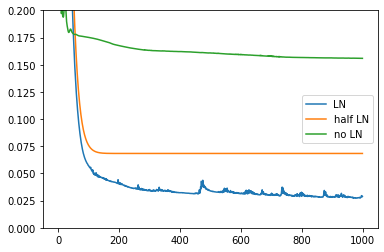

In [9]:
for name, loss in losses.items():
    print(name, loss[-1])
    plt.plot(loss, label=name)
plt.legend()
plt.ylim(top=0.2, bottom=0.0)
plt.show()

LN


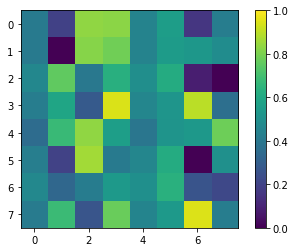

half LN


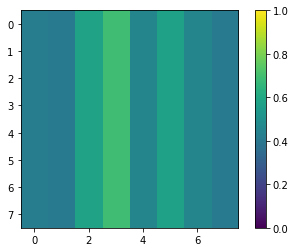

no LN


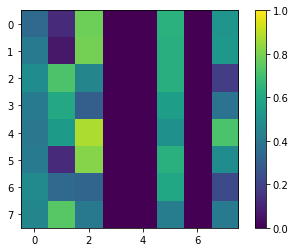

In [10]:
with torch.no_grad():
    for name, layer in layers.items():
        print(name)
        plt.imshow(layer(input_matrix.unsqueeze(2), None), vmin=0, vmax=1)
        plt.colorbar()
        plt.show()

Target


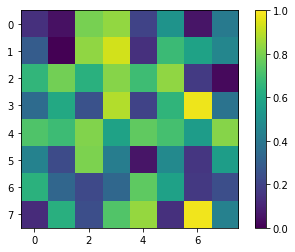

Mean


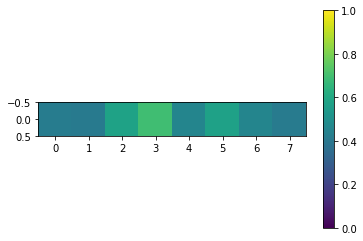

In [11]:
output_mean = torch.mean(output_matrix, dim=0, keepdims=True)
print("Target")
plt.imshow(output_matrix, vmin=0, vmax=1)
plt.colorbar()
plt.show()
print("Mean")
plt.imshow(output_mean, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [12]:
fc = drlqap.nn.FullyConnected(n, w, w, 3, activation=torch.nn.Sigmoid, layer_norm=False)
fc_ln = drlqap.nn.FullyConnected(n, w, w, 3, activation=torch.nn.Sigmoid, layer_norm=True)

In [13]:
fc_losses = train(fc, 1000, input_matrix)
fc_ln_losses = train(fc_ln, 1000, input_matrix)

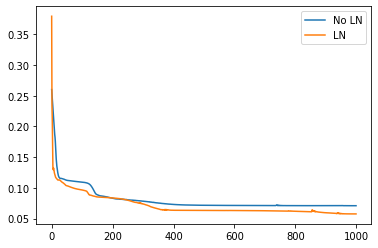

In [14]:
plt.plot(fc_losses, label="No LN")
plt.plot(fc_ln_losses, label="LN")
plt.legend()

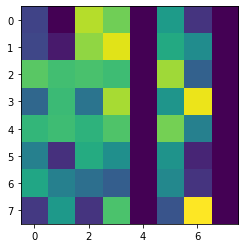

In [15]:
plt.imshow(fc(input_matrix).detach(), vmin=0, vmax=1)